# **Convolutions: A fancy multiplication algorithm with many uses**



---


##### *by [Hannah Hasson](https://hrhasson.github.io/) (Sandia National Labs)*

Reminder: [Code of Conduct](https://docs.google.com/presentation/d/1UiBbQLGCZ_8VTTufJGitjnfz2Lj12TzAPuvHLvRLMhk/edit?usp=sharing)

&nbsp;

A *highly* recommended video to accompany this lesson : https://www.youtube.com/watch?v=KuXjwB4LzSA

Much of this lesson is based on this excellent guide: https://betterexplained.com/articles/intuitive-convolution/
&nbsp;


#**What is a convolution?**

A convolution can be thought of as a fancier way to multiply two functions, and is sometimes referred to as "blending" two curves. This is a more complex algorithm, though: there is an integral involved! Let's say we want to convolve two 1D curves, $f(t)$ and $g(t)$. The convolution $(f \ast g)$ is:

$$(f \ast g)(t):=\int_{-\infty}^{\infty} f(\tau) g(t-\tau) d \tau$$

**Note that in math, convolutions are always denoted with the star $\ast$.** Let's break down more simply what is happening though, because this looks gross:

1. Take two curves (f and g)
2. Flip one backwards (hence the $-\tau$)
3. Displace the backwards curve from the other by some constant $t$
4. Get the area under the curves where they overlap
5. Rinse and repeat for different shifts ($t$ values)

&nbsp;

You can think of this as the **Missy Elliot algorithm: put your thing down, flip it and reverse it.**

This means you "slide" one curve along the other and add up the area to get the new value at each shift $t$. This becomes much more concrete once you look at how to do it with discrete data. Now we will assume that **each of our curves $f$ and $g$ are a 1D array of values**. For simplicity let's start by assuming curve $g$, which we call the **kernel** (the one we slide, usually the smaller one), is only one element. Here is a visual of what that process looks like:


<p align="center">
  <img width="500" src="https://drive.google.com/uc?export=view&id=1UhXchrI42Cmu31BuiZcp3S4IzqiLBYrO"
>
</p>

Each time the kernel slides, we multiply it by the cell it is lined up with to get the new value at that point. You may have noticed this is just equivalent to multiplying the top array by the value in the kernel. This is true, but becomes more interesting once we make the kernel longer than one element. Let's try this now with a kernel that is 2 elements long:



<p align="center">
  <img width="500" src="https://drive.google.com/uc?export=view&id=1yFVrR2yGjB-_kl2bUGjWOLlFNoOGojnA"
>
</p>

Now we multiply each element in the kernel with the values of the elements they line up with, THEN add those products together. This now gives a completely different array as the output. But when does this even come up in research?



##**Where do convolutions show up in science?**

When you google a convolution these days, you will mostly find people talking about **machine learning and convolutional neural networks (CNNs)**. While this is an important application of convolutions, they also show up in a lot of situations you may not expect. For example, calculating the total medicine needed each day as new patients come into a clinic may be represented with a convolution ([see explanation here](https://betterexplained.com/articles/intuitive-convolution/#Part_1_Hospital_Analogy)). This can be generalized to anything with competing rates of change, such as buildup of radioactive nuclear waste in a power plant where the waste present is always decaying but new waste is also being introduced at the same time.

&nbsp;

Convolutions are a critical tool in all types of signal/image processing. You can create kernels that detect edges in images, smooth noisy data, and fix optical distortion in a recorded image (including telecopes, microscopes, and spectrometers).

&nbsp;

What this means is that convolutions are useful processing tools, but also that **a lot of measurements we make in real life are actually the true signal convolved with distortions of the instrument we used to measure.** If you can characterize what an instrument's response function is (i.e. the way it blurs/distorts sharp edges), then you can remove its effects using a **deconvolution**. This means you can un-blur your data/images in these cases!

&nbsp;

Here are two examples of deconvolving signals to get a much sharper measurement:

* 1D example of a measured signal (green) and the deconvolved signal (blue) based on the instrument. The peaks become much sharper and more obvious once the signal is deconvolved:

<p align="center">
  <a href="https://terpconnect.umd.edu/~toh/spectrum/Deconvolution.html">
  <img width="800" src="https://drive.google.com/uc?export=view&id=1UZVpseVWhNrRRwqEXukbsvHhQxId9Zdc">
  </a>
</p>


&nbsp;

* An image of the Antenna galaxies before (a) and after (b) deconvolution with a gaussian kernel from the telescope and camera optics:

<p align="center">
  <a href="https://www.researchgate.net/figure/Space-image-deconvolution-results-Source-ESA-Hubble-distributed-under-CC-BY-40_fig1_341830887">
  <img width="500" src="https://www.researchgate.net/publication/341830887/figure/fig1/AS:898026855993356@1591117695781/Space-image-deconvolution-results-Source-ESA-Hubble-distributed-under-CC-BY-40.jpg">
  </a>
</p>

&nbsp;

Another crucial application of convolutions comes into play whenever you're dealing with filtering with **Fourier transforms**! What's that, you thought you had escaped them? Nope, they're everywhere! We'll get further into that later in the lesson, but **applying filters in fourier space inherently involves convolutions**! So you've been doing them all along! Mwahaha!


<p align="center">
  <a href="https://www.researchgate.net/figure/Space-image-deconvolution-results-Source-ESA-Hubble-distributed-under-CC-BY-40_fig1_341830887">
  <img width="300" src="https://i.pinimg.com/originals/ea/60/c9/ea60c9377cdc5403c901336afac737c3.jpg">
  </a>
</p>



#**How to perform a 1D convolution in python**

Let's learn how to do convolutions ourselves. Thankfully python makes it very straightforward to perform this operation. You don't need to write some big crazy `for` loop that shifts one array past your other array and takes the product. All you need to do is throw your two arrays into the function [numpy.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)

    np.convolve(array1, array2, mode="full")

The lovely thing about convolutions is that they are commutative operations, meaning **it doesn't matter what order you put the arrays in**. So you can put the kernel and the input in whichever order you want.

The mode determines whether the convolution will only count regions where all the cells of the kernel overlap with the input array ("valid" mode) or will count regions where only some cells overlap at the edges ("full" mode). You can also just ask it to make the returned array the same size as the largest of the inputs ("same" mode).

###**Exercise 1:**
Make a 50-element 1D array using `np.linspace()` that goes from -2$\pi$ to 2$\pi$ and then make another array that feeds these points into a sine function. Make a kernel array with 3 values that are all the same. Convolve the kernel with the sine array in "same" mode. Plot the input arrays and the result together on one plot.

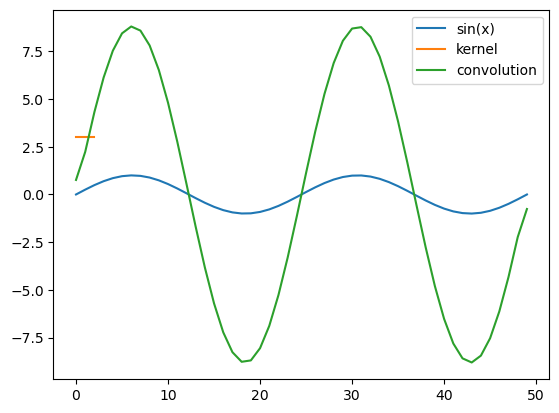

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#code here
x = np.linspace(-2*np.pi, 2*np.pi, 50)
sinx = np.sin(x)
kern = 3 * np.ones(3)
conv = np.convolve(sinx, kern, mode="same")
plt.plot(sinx, label="sin(x)")
plt.plot(kern, label = "kernel")
plt.plot(conv, label="convolution")
plt.legend()
plt.show()

#**Applying convolutions: Smoothing data**
This is where we start exploring the research applications we discussed! Convolutions are extremely powerful and can do a lot of different kinds of operations. Let's start by discussing how you can smooth data with convolutions.

<br>

##Uniform Moving Averages

One of the simplest applications of a convolution can be to compute a **moving average** (also called a rolling average) over a particular number of cells. This takes the mean of several adjacent cells and makes it the new value of the cell aligned with the center of the kernel. This is a great way to smooth data! We could take a moving average across two cells by just taking the two-element kernel in the GIF earlier and making each element's value 0.5. That way it takes an average of the two cells that the kernel is lined up with.

If you wanted to do a moving average over 3 cells, you'd simply use a kernel with 3 elements where all the values are 1/3. The pattern here is for a kernel of length **n**, the value of all the cells should be **1/n**.

Here is a nice image of a moving average (in red) of some really noisey data (in blue):

<p align="center">
  <img width="400" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Lissage_sinus_bruite_moyenne_glissante.svg/800px-Lissage_sinus_bruite_moyenne_glissante.svg.png"
>
</p>

Choosing a longer kernel will mean you are averaging over more points, and therefore your data will become smoother! However, you don't want it so smoothed that you lose the overall shape of your data. So it's important to pick your kernel size carefully.

<br>

##Weighted averages: Gaussian smoothing

You can also do weighted averages this same way, so that (for example) values in cells that are closer to the center of the kernel influence the new value the most. Again here we will make the values in the kernal add up to 1 (this is called normalizing). One extremely common example of a weighted, normalized kernel is the **Gaussian kernel**. This is where you pick a kernel of a certain length, then assign the values following the shape of a Gaussian curve.

For example, if you wanted a kernel with a length of 15, your element values would look something like this:

<p align="center">
  <img width="400" src="https://mathworld.wolfram.com/images/eps-svg/BinomialGaussian_1000.svg"
>
</p>


This works well in 2D too! You would have a large 2D input array $f$ and a small 2D Gaussian kernel $g$ that would appear something like this:

<p align="center">
  <img width="250" height="300" src="https://www.researchgate.net/profile/Giovanna-Sannino/publication/302973724/figure/fig3/AS:651916656791555@1532440451926/2D-Gaussian-filter.png"
>
</p>

Where the red values are higher and the blue values are closer to zero. The sum of all the kernel cells must still add to 1.


Let's do an example of a moving average and a gaussian smoothing filter now!





### **Exercise 2: 1D smoothing**

#### Part A)
Let's first make a set of noisy 1D data. We have imported the `random` package as `r` and then make a set of 300 random numbers between 0 and 20 using `rand`. It is up to you to now make a uniform array to be our moving average kernel. Use `np.ones` to make an array of some length *n* and then multiply it by *1/n to normalize it. Apply the convolution to the data using `np.convolve` and then plot it.

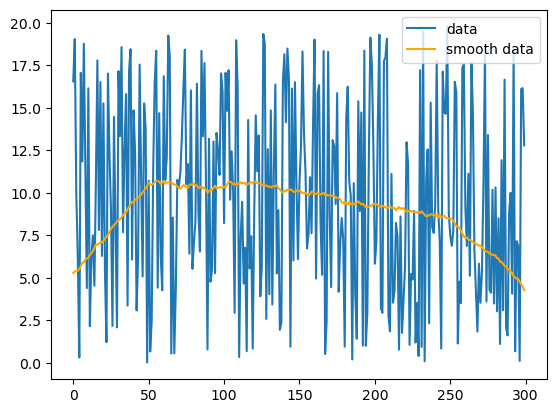

In [7]:
import numpy.random as r

data = 20*r.rand(300)

#code here
n = 100
kern = (1/n) * np.ones(n)
conv = np.convolve(data, kern, mode="same")
plt.plot(data,label="data")
plt.plot(conv,label="smooth data", color="orange")
plt.legend()
plt.show()

Play around with different kernel lengths to see what it does to the data! Don't forget to change your normalization factor each time (*1/n* for array length *n*)

#### Part B)

Now let's do a 1D convolution with a gaussian kernel. First we will upload a data file, "spectrum.csv" which we used briefly in Part 1. Read its two columns into arrays using `np.genfromtxt`. Once loaded, check the shape of the array (`np.shape`) and plot the second column (flux) against the first column (wavelength).


To make our 1D gaussian kernel, we will use the provided `gaussian_kernel_1D` function, whose inputs are:
* n, the number of points (choose an odd number so we have a peak at the center)
* sigma, half the width of the Gaussian curve

Make a gaussian kernel that is 11 points long with sigma=2 and then convolve it with the signal column of your spectrum data in "same" mode. Plot the resulting array against the wavelength.


In [ ]:
def gaussian_kernel_1D(n,sigma):
    r = np.linspace(-int(n/2)+0.5,int(n/2)-0.5, n)
    return [1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-float(x)**2/(2*sigma**2)) for x in r]

#code here
wavelength, flux = np.genfromtxt("spectrum.csv", delimiter=",", unpack=True)

kern = gaussian_kernel_1D(21, 1)
convFlux = np.convolve(kern, flux, mode="same")
plt.plot(wavelength, flux, label="flux")
plt.plot(wavelength, convFlux, label="gaussian flux")
plt.legend()
plt.show()

NameError: name 'flux' is not defined

Note that this causes the peak to shrink, but also to widen (area under the curve is preserved because the kernel adds to 1). Once you get your plot, try playing around with the size of your kernel and the width of the gaussian.

&nbsp;

---
#TAKE A BREAK HERE
---

&nbsp;

#**2D convolutions**

It may still not be clear how you would even perform a 2D convolution. Let's look at a handy-dandy graphic!

<p align="center">
  <img width="500" src="https://www.practiceprobs.com/problemsets/python-numpy/images/convolution.gif"
>
</p>

Note that the values in the kernel in this graphic are chosen randomly and do not add up to 1.


We can see that each time we move the kernel around we multiply all the overlapping values and then add them to get one value in the output array. That output array is smaller than the original one we started with, though... Why?
That is because this GIF is doing the 2D equivalent of "valid" mode from `numpy.convolve` where it only outputs values when **the entire kernel is overlapping with the input array**.

If we want the output array to be the same size as the input array, we need to calculate elements where the center of the kernel overlaps with the edge values too. This means there will be elements of the kernel that don't overlap with anything... What do we do? There are different ways to handle this, but a common approach is to just add a layer of cells around the edge of the input array with the same value as the current boundary cells.

#Edge detection in images

Often in research we have images of our experiment at multiple times, and we would like to track how some feature evolves. This is when edge detection can be extremely useful. For example, here is a cell mutating and growing where the egde is being tracked over time:


<p align="center">
  <img width="250" height="300" src="https://cbia.fi.muni.cz/images/research/spatiotemporal/organoids/cropped-results-FIB.gif"
>
</p>



As with smoothing, there are a few different types of kernels that you can use to do edge detection with convolutions. All of these are essentially different ways to **represent a derivative as a matrix**. This makes sense because if we took the derivative at every pixel in an image, the largest derivatives would occur at the sharpest edges where the pixel values jump the most.


&nbsp;

We will use one of the simplest methods here, the **Laplacian kernel**. Here is what that looks like in a 3x3 array:

In [ ]:
laplacian_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

Let's now try colvolving this with an image. To do that, we will use the function **`cv2.filter2d`** which has the following form:

```
cv2.filter2d(image, depth, kernel)
```

The *image* will be the 2D array of our image. *Depth* is the data type of the output array (i.e. different sized floats), but **we will always set depth to -1** to use the same data type as our input. Finally *kernel* will of course be our 2D kernel array.


&nbsp;

Let's try this out now. We will load in an image I arbitrarily chose from the interwebs and apply the edge detection filter:

--2025-05-03 19:04:31--  https://upload.wikimedia.org/wikipedia/en/4/45/Side_Eyeing_Chloe.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75562 (74K) [image/jpeg]
Saving to: ‘/content/side_eye.png’

/content/side_eye.p 100%[===================>]  73.79K  --.-KB/s    in 0.06s   

2025-05-03 19:04:31 (1.27 MB/s) - ‘/content/side_eye.png’ saved [75562/75562]



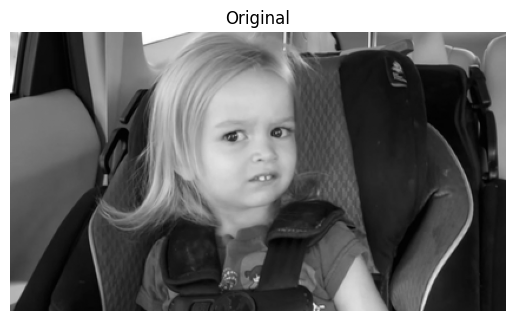

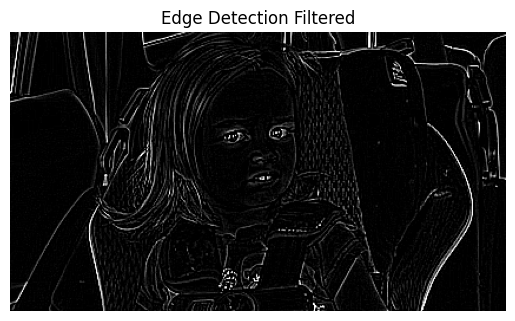

In [ ]:
import cv2

#Handy Colab trick to pull images from the internet
!wget https://upload.wikimedia.org/wikipedia/en/4/45/Side_Eyeing_Chloe.jpg -O /content/side_eye.png

#Load image and display
input_image = cv2.imread("side_eye.png",0) #read in greyscale image

plt.imshow(input_image,cmap="grey") #display image
plt.axis("Off") #remove the axes
plt.title("Original")
plt.show()

#Filter image and display
filtered_image = cv2.filter2D(input_image, -1, laplacian_kernel) #apply the edge detection filter

plt.imshow(filtered_image,cmap="grey") #display filtered image
plt.axis("Off") #remove the axes
plt.title("Edge Detection Filtered")
plt.show()

Nice! We see that all of the sharp edges are displayed in white (high pixel value) while everything else is left in black (zero pixel value). However, this filter is very sensitive to noise.

&nbsp;

It may sound strange, but often this process is enhanced by **first performing a Gaussian blur on your data and THEN applying the Laplacian**. This is commonly referred to as an "LoG" filter, which stands for "**Laplacian of Gaussian**." Let's try that now.


###**Exercise 3**

Use cv2.filter2D with a Gaussian kernel to apply a Gaussian blur to our image from the last example, and then again with a Laplacian kernel to apply edge detection.

####Part A)
First apply a Gaussian filter using the following kernel:

<p align="center">
  <img width="250" src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f91401a3e97428f14862afa1c781c55f4157580b"
>
</p>

Then display your blurred image using `plt.imshow`



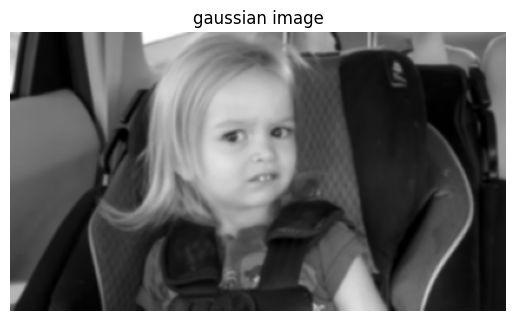

In [ ]:
#code here
gaussKern = (1/256) * np.array([[1, 4, 6, 4, 1,], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1,]])
gaussImage = cv2.filter2D(input_image, -1, gaussKern)
plt.axis("off")
plt.title("gaussian image")
plt.imshow(gaussImage, cmap="grey")
plt.show()

For future reference, there is also a built-in function in scipy.ndimage called [`gaussian_filter`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html) that can also make your gaussian kernel of any size and colvolve it with your 2D image array. The same exists for applying gaussian blur to a 1D array called [`gaussian_filter_1D`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter1d.html).

####Part B

Now apply Laplacian edge detection on the blurred image from above using the same kernel as we did in the example. Display your final blurred and edge detected image!

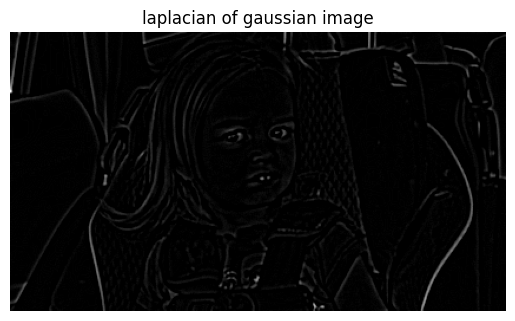

In [ ]:
#code here
laplaceImage = cv2.filter2D(gaussImage, -1, laplacian_kernel)
plt.axis("off")
plt.title("laplacian of gaussian image")
plt.imshow(laplaceImage, cmap="grey")
plt.show()

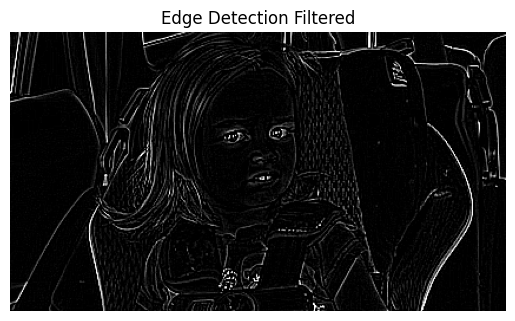

In [ ]:
#Compare to the original Laplacian filter by itself (run this cell as is)
plt.imshow(filtered_image,cmap="grey") #display filtered image
plt.axis("Off") #remove the axes
plt.title("Edge Detection Filtered")
plt.show()

You will notice that all the edges are much more muted in our smoothed and edge filtered version. This can be a good thing for supressing high-signal noise that can falsely show up as edges, or for removing already weak edges that we want to ignore.

If you are looking for a feature's boundary, it's generally a good idea to smooth first so that the boundary you detect will be smooth.

&nbsp;

There are also other types of edge detection kernels that will pick out edges only along one direction, or find more subtle edges. Check out [this article](https://medium.com/@akashsingh9303/image-processing-using-convolution-kernels-in-python-a-practical-guide-2da3252b033a) for some examples.

#**The link between convolutions and Fourier transforms**

So we've been subtly leading you toward a piece of information that is mathematically extremely useful. There is an important tie between convolutions and Fourier transforms:

&nbsp;

**Taking a convolution of two functions (or arrays) is equivalent to multiplying them in Fourier/frequency space**

This is called the **Convolution Theorem**!


&nbsp;

...What? This is a weird statement, so let's look at it in practice. If I take the Fourier transforms of my image and my 2D edge detection filter as so:

* first we pad our kernel array with zeros until it is the same size as the image array. That way we can later multiply the two arrays element-wise
* then take the Fourier transform of each array

[[ 8 -1  0 ...  0  0 -1]
 [-1 -1  0 ...  0  0 -1]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [-1 -1  0 ...  0  0 -1]]


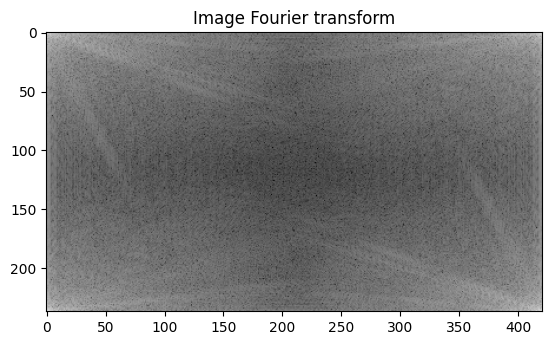

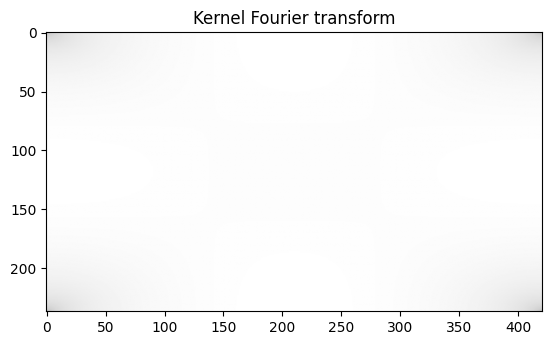

In [ ]:
#pad the kernel array with zeros until it's the same size as the image array
rowpad= int((input_image.shape[0]-laplacian_kernel.shape[0])/2) #how many rows of zeros needed
colpad = int((input_image.shape[1]-laplacian_kernel.shape[1])/2) #how many columns of zeros needed

kernel_pad = np.pad(laplacian_kernel,((rowpad,rowpad),(colpad,colpad)),mode="constant")
kernel_pad = np.fft.ifftshift(kernel_pad) #shift the kernel so the FFT works

print(kernel_pad)

#Take Fourier transforms of image and kernel
FTimage = np.fft.fft2(input_image)
FTkernel = np.fft.fft2(kernel_pad)

plt.imshow(np.log10(np.abs(FTimage)),cmap="grey")
plt.title("Image Fourier transform")
plt.show()
plt.imshow(np.log10(np.abs(FTkernel)),cmap="grey")
plt.title("Kernel Fourier transform")
plt.show()

Ok, well this doesn't tell us much yet. Let's multiply these and then do the inverse FFT to see what we have back in the spatial domain.

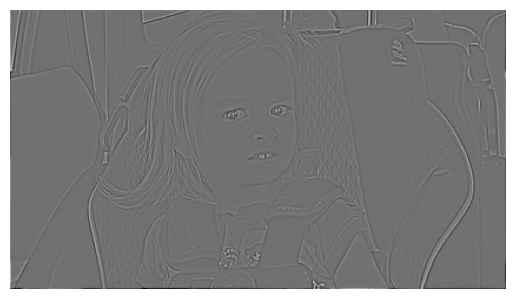

In [ ]:
FTconv = FTimage*np.conj(FTkernel) #conjugate means flip sign of imaginary numbers

convolved_image = np.fft.ifft2(FTconv)
plt.axis("Off") #remove the axes
plt.imshow(np.real(convolved_image),cmap="grey")
plt.show()

It's not perfect (there is a decent amount of noise introduced here). But it did achieve convolving our image with our edge detector! This means that you can actually achieve convolutions with Fourier transforms! In fact, this is a computationally quicker way to do them for large arrays, so people will often use [`scipy.signal.fftconvolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.fftconvolve.html).

The syntax for that function is

```
scipy.signal.fftconvolve(array1, array2)

```

Where one of the arrays is your data and one is the kernel.


As a final exercise, let's try using this method to convolve our example image and our edge detection kernel. Again.

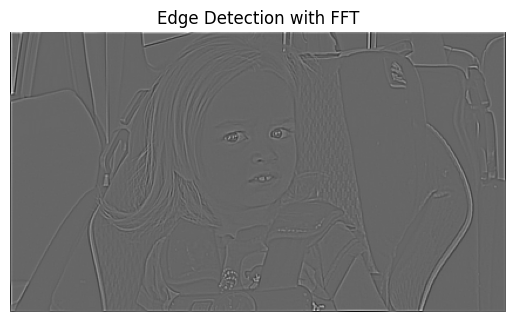

In [ ]:
import scipy.signal as sig

fftconv = sig.fftconvolve(input_image,laplacian_kernel)

plt.imshow(fftconv,cmap="grey")
plt.axis("Off") #remove the axes
plt.title("Edge Detection with FFT")
plt.show()

Again, there was noise introduced that made our contrast not quite as sharp, but the convolution was achieved!

##Deconvolutions

So knowing this now, let's think about how you would *deconvolve* an image. Let's say that our true data is array **f**, our instrument's blurring kernel is **g** and our convolved data we measure is **h**. In theory, we could get the true data **f** via Fourier transforms (FT):

We know

(**f** * **g**) = **h**

and with the Convolution theorem we can then express:

FT(**f**) $\cdot$ FT(**g**) = FT(**h**)

we can then do a straightforward division:

FT(**f**) = FT(**h**)/FT(**g**)

Now all we do is take the inverse FT of both sides and shazam! We have our true signal **f**!

&nbsp;

Note that the noise produced from this technique can be very problematic if you compute it this way. However, if you can characterize the noise that exists in your data to begin with, there are methods that can be used to reduce the noise amplification in deconvolution.

That is how you end up with the cool astronomy image example we gave in the beginning!

#**Outro**

Great job today! Missy Elliott is proud of you for putting your thing down, flipping and reversing it!

<p align="center">
  <img width="400" src="https://i.makeagif.com/media/7-01-2016/tptOQ_.gif"
>
</p>


If you are still not convinced that convolutions are interesting/useful, let me finish with a helpful list of things that ChatGPT suggested that convolutions are used for (this is of course not a comprehensive list:)

&nbsp;

1. **Image Processing and Computer Vision**
* Edge Detection
* Blurring and Sharpening
* Feature Extraction
2. **Signal Processing**
* Noise Reduction
* Echo Cancellation
* Time-Domain Filtering
3. **Medical Imaging**
* Reconstructing MRI and CT images
* Image Enhancement
* Feature Detection of tumors, fractures, or abnormalities
4. **Astronomy**
* Image De-noising for ground-based telescopes
* Pattern Recognition of celestial objects in large datasets
* Signal Analysis for radio telescopes
5. **Audio Processing**
* Applying Reverb and Echo Effects
* Speech Recognition
* Sound Localization (surround sound)
6. **Physics and Engineering**
* Wave Propagation through different media
* Correction of signal distortion
* Finite Element Analysis (solving partial differential equations)
7. **Neuroscience**
* Brain Signal Analysis (EEG and fMRI)
* Neural Modeling
8. **Natural Language Processing (NLP)**
* Text Classification
* Language Translation
9. **Geophysics**
* Seismic Data Analysis
* Reconstructing Subsurface Images
10. **Robotics**
* Sensor Data Processing (navigation and obstacle detection)
* Object Recognition
11. **Quantum Mechanics**
* Wave Function Analysis
12. **Environmental Science**
* Climate Modeling
* Satellite Image Analysis


Thanks for attending the Signal and Image Processing track! We would love to get your thoughts on the track in the [feedback form](https://docs.google.com/forms/d/e/1FAIpQLSdzzC9-vBv5DflUQ2kgp4Z_6JKkvi_Id2D3lTLezRikHDJkww/viewform).